# Plotting Query Results

## Setup

In [1]:
#!pip install emoji
import emoji

In [2]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd

In [4]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect

In [5]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///Resources/emoji.sqlite", echo=False)

## Explore Database

In [6]:
inspector = inspect(engine)

In [7]:
# Use the Inspector to explore the database and print the table names
inspector.get_table_names()

['emoji']

In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [9]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
result = engine.execute("SELECT * FROM EMOJI LIMIT 10")

In [10]:
for row in result:
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [11]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [12]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [13]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).order_by(Emoji.score.desc()).limit(10)
for result in results:
    print(result)

('😂', '1F602', 1814832150)
('❤️', '2764', 840619939)
('😍', '1F60D', 680382416)
('♥️', '2665', 652715459)
('😭', '1F62D', 515991922)
('😊', '1F60A', 484540701)
('♻️', '267B', 452489849)
('😒', '1F612', 441690175)
('💕', '1F495', 381679908)
('😘', '1F618', 377847645)


Unpack tuples using list comprehensions

In [14]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
emoji_char = [result[0] for result in results]
emoji_id = [result[1]for result in results]
scores =[result[2] for result in results]

## Plot using Matplotlib

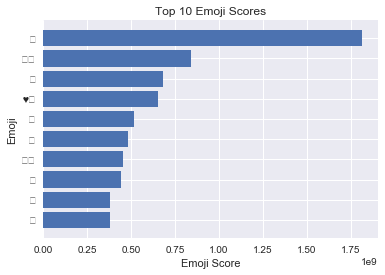

In [23]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
from matplotlib.font_manager import FontProperties

prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
plt.rcParams['font.family']=prop.get_family()
plt.barh(emoji_char, scores)
#plt.annotate(fontproperties = prop)
plt.ylabel("Emoji")
plt.xlabel("Emoji Score")
plt.title("Top 10 Emoji Scores")
plt.gca().invert_yaxis()
plt.savefig("Top 10 Emoji Scores")


## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [16]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
#conn = engine.connect()
#emoji_df = pd.read_sql("SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC LIMIT 10", conn)
emoji_dict = {'emoji':emoji_char, "emoji_id":emoji_id, 'score':scores}
emoji_df = pd.DataFrame(emoji_dict)
emoji_df = emoji_df.sort_values("score", ascending = True)
emoji_df = emoji_df.set_index("emoji_id")
emoji_df

,emoji,score
emoji_id,,
1F618,😘,377847645
1F495,💕,381679908
1F612,😒,441690175
267B,♻️,452489849
1F60A,😊,484540701
1F62D,😭,515991922
2665,♥️,652715459
1F60D,😍,680382416
2764,❤️,840619939


Plot using Pandas

Text(0, 0.5, 'Emoji')

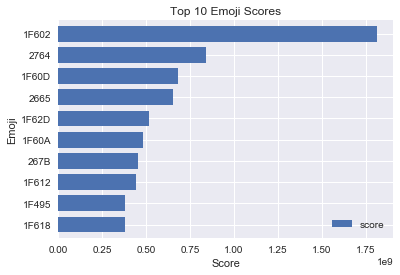

In [17]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
emoji_chart = emoji_df.plot(kind='barh', width = 0.75, title = "Top 10 Emoji Scores")
emoji_chart.set_xlabel("Score")
emoji_chart.set_ylabel("Emoji")

In [18]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
conn = engine.connect()
emoji_df = pd.read_sql("SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC LIMIT 10", conn)
emoji_df

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
5,😊,1F60A,484540701
6,♻️,267B,452489849
7,😒,1F612,441690175
8,💕,1F495,381679908
9,😘,1F618,377847645
